<a href="https://colab.research.google.com/github/Nithya9404/Deep_Learning/blob/main/Deep_learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Face Recognition using CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

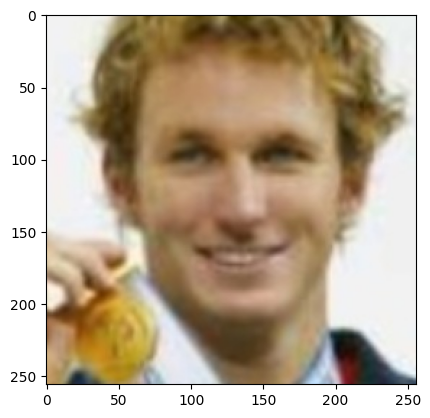

In [4]:
img = image.load_img("/content/drive/MyDrive/datasets/archive/basedata/training/face/person_0007.jpg")
plt.imshow(img)

In [6]:
cv2.imread("/content/drive/MyDrive/datasets/archive/basedata/training/face/person_0007.jpg").shape

(256, 256, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation =ImageDataGenerator(rescale = 1/255)

In [8]:
trained_dataset = train.flow_from_directory("/content/drive/MyDrive/datasets/archive/basedata/training",target_size=(200,200),batch_size= 3,
                                                                            class_mode ='binary')
validation_dataset = train.flow_from_directory("/content/drive/MyDrive/datasets/archive/basedata/validation",target_size=(200,200),batch_size= 3,
                                                                            class_mode ='binary')

Found 1046 images belonging to 2 classes.
Found 1046 images belonging to 2 classes.


In [9]:
trained_dataset.class_indices

{'face': 0, 'not_face': 1}

In [10]:
trained_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [12]:
model.compile(loss ='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])
model_fit = model.fit(trained_dataset,
                     steps_per_epoch = 3,
                     epochs =35,
                     validation_data = validation_dataset)

Epoch 1/35
3/3 [==============================] - 231s 115s/step - loss: 0.2144 - accuracy: 0.8889 - val_loss: 2.2114 - val_accuracy: 0.9426
Epoch 2/35
3/3 [==============================] - 12s 6s/step - loss: 6.8215e-15 - accuracy: 1.0000 - val_loss: 2.2114 - val_accuracy: 0.9426
Epoch 3/35
3/3 [==============================] - 12s 6s/step - loss: 5.2878 - accuracy: 0.6667 - val_loss: 0.2289 - val_accuracy: 0.9426
Epoch 4/35
3/3 [==============================] - 12s 6s/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.3856 - val_accuracy: 0.9426
Epoch 5/35
3/3 [==============================] - 12s 6s/step - loss: 1.2752 - accuracy: 0.5556 - val_loss: 0.2192 - val_accuracy: 0.9426
Epoch 6/35
3/3 [==============================] - 12s 6s/step - loss: 0.0434 - accuracy: 1.0000 - val_loss: 0.3018 - val_accuracy: 0.9426
Epoch 7/35
3/3 [==============================] - 21s 10s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 0.9426
Epoch 8/35
3/3 [==========

In [17]:
from tensorflow.keras.models import load_model, save_model

# Assuming you have a trained model stored in a variable 'model'
# Replace 'model' with the actual name of your model variable

# Save the model to a file (e.g., 'my_model.h5')
model.save('my_model.h5')

# You can also save it in the TensorFlow SavedModel format
# model.save('my_model')  # This creates a directory 'my_model' with the saved model

print("Model saved successfully.")


Model saved successfully.


In [15]:
!pip install opencv-python


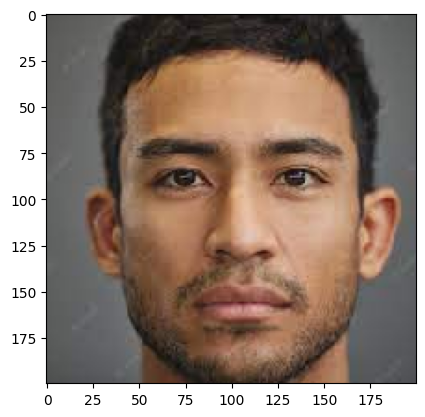

1/1 [==============================] - 0s 88ms/step
Face detected


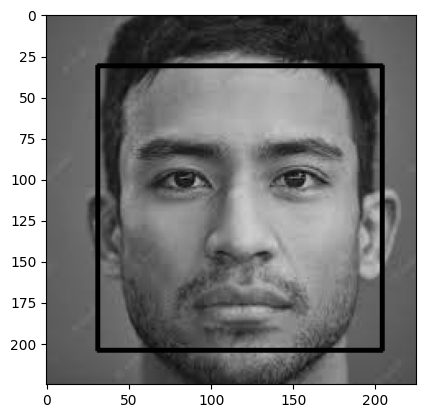

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2

# Load your trained model here
model = load_model('my_model.h5')  # Replace with the path to your trained model

# Load an image
img_path = "/content/drive/MyDrive/datasets/testing/testing/download (3).jfif"  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(200, 200))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

# Use your model to predict
val = model.predict(X)

# Convert the image to grayscale for face detection
gray_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)

# Load the pre-trained face detection model from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

if val[0][0] <= 0.5 and len(faces) > 0:
    print("Face detected")
    # Draw a rectangle around the detected face(s)
    for (x, y, w, h) in faces:
        cv2.rectangle(gray_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles
    plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Face not detected")




In [22]:
validation_accuracy = model.evaluate(validation_dataset)

# Print the validation accuracy
print(f"Validation Accuracy: {validation_accuracy[1] * 100:.4f}")

349/349 [==============================] - 14s 40ms/step - loss: 0.2693 - accuracy: 0.9426
Validation Accuracy: 94.2639
